In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib's pyplot for creating plots
import matplotlib.pyplot as plt

# Import functions and classes from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
# Define the file path to the dataset
file_path = 'C:\Personal_Projects\projects\Machine Learrning\credit_card_fraud_detection\data\creditcard.csv'  # Replace with the actual path to your dataset

# Load the credit card dataset using pandas
credit_card_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Pre-Processing

In [4]:
# Calculate the number of missing values in each column of the credit_card_df DataFrame
missing_values = credit_card_df.isnull().sum()

# Print the results
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Get the list of column names in the credit_card_df DataFrame
credit_card_df_columns = credit_card_df.columns

# Iterate through each column and print the number of unique values
for column_name in credit_card_df_columns:
    unique_values_count = len(credit_card_df[column_name].unique())
    print(f"Column '{column_name}' has {unique_values_count} unique values.")

Column 'Time' has 124592 unique values.
Column 'V1' has 275663 unique values.
Column 'V2' has 275663 unique values.
Column 'V3' has 275663 unique values.
Column 'V4' has 275663 unique values.
Column 'V5' has 275663 unique values.
Column 'V6' has 275663 unique values.
Column 'V7' has 275663 unique values.
Column 'V8' has 275663 unique values.
Column 'V9' has 275663 unique values.
Column 'V10' has 275663 unique values.
Column 'V11' has 275663 unique values.
Column 'V12' has 275663 unique values.
Column 'V13' has 275663 unique values.
Column 'V14' has 275663 unique values.
Column 'V15' has 275663 unique values.
Column 'V16' has 275663 unique values.
Column 'V17' has 275663 unique values.
Column 'V18' has 275663 unique values.
Column 'V19' has 275663 unique values.
Column 'V20' has 275663 unique values.
Column 'V21' has 275663 unique values.
Column 'V22' has 275663 unique values.
Column 'V23' has 275663 unique values.
Column 'V24' has 275663 unique values.
Column 'V25' has 275663 unique va

In [6]:
# Display the first 10 rows of the credit_card_df DataFrame
credit_card_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
# Generate summary statistics for numerical columns in the credit_card_df DataFrame
summary_statistics = credit_card_df.describe()

# Display the summary statistics
print(summary_statistics)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
# Converting Time Column

# Convert the 'Time' column to a datetime format
credit_card_df["datetime"] = pd.to_datetime(credit_card_df['Time'], unit='s')

# Extract the time component and format it as HH:MM:SS
credit_card_df["Time"] = credit_card_df["datetime"].dt.strftime('%H:%M:%S')

# Convert the 'datetime' column to HH:MM:SS format
credit_card_df["datetime"] = credit_card_df["datetime"].dt.strftime('%H:%M:%S')

# Drop the original 'Time' column
credit_card_df.drop(columns=['Time'], inplace=True)

# Rename the 'datetime' column to 'Time'
credit_card_df.rename(columns={"datetime":"Time"}, inplace=True)

# Display the modified DataFrame
credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,00:00:00
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,00:00:00
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,00:00:01
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,00:00:01
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,00:00:02


In [9]:
# Display a concise summary of the credit_card_df DataFrame
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [10]:
# Calculate and print the percentage of fraud and non-fraud transactions

# Calculate the percentage of fraud transactions
fraud_percentage = round(credit_card_df['Class'].value_counts()[1] / len(credit_card_df) * 100, 2)
print("Fraud! :", fraud_percentage, "%")

# Calculate the percentage of non-fraud transactions
non_fraud_percentage = round(credit_card_df['Class'].value_counts()[0] / len(credit_card_df) * 100, 2)
print("No Fraud! :", non_fraud_percentage, "%")

Fraud! : 0.17 %
No Fraud! : 99.83 %


In [11]:
# Separate features (x) and target (y) variables

# Remove the "Class" and "Time" columns from the features (x)
x = credit_card_df.drop(columns=["Class","Time"])

# Get the "Class" column as the target (y)
y = credit_card_df["Class"]

# Split the dataset into training and testing sets using train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)

In [12]:
# Initialize and train a logistic regression model

# Initialize a logistic regression model with increased maximum iterations
logistic_regression = LogisticRegression(max_iter=10000)

# Train the model using the training data
logistic_regression.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

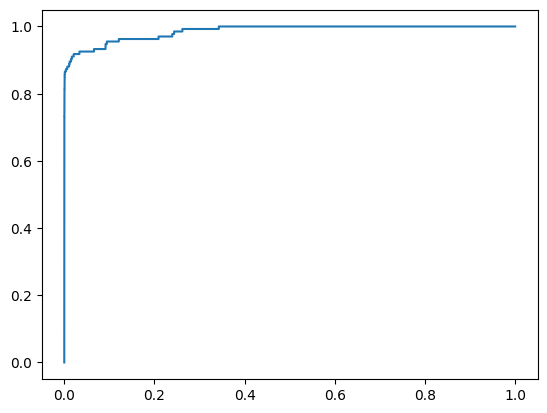

In [13]:
# Generate and plot the ROC curve

# Get the predicted probabilities for the positive class (fraudulent) from the model
y_predict = logistic_regression.predict_proba(x_test)
y_predict = y_predict[:, 1]  # Probability of being fraudulent

# Calculate the ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_predict)

# Plot the ROC curve
plt.plot(fpr, tpr)

In [14]:
# Calculate the ROC AUC score

# Calculate the ROC AUC score using the predicted probabilities and the actual labels
roc_auc = roc_auc_score(y_test, y_predict)

# Print the calculated ROC AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9858434736724424
